# Introduction

When we make any transaction while purchasing any product online, a good amount of people prefer credit cards. A high credit limit in credit cards sometimes helps us making expensive purchases even if we don’t have the savings at that time. But, on the other hand, these features are misused by cyber attackers.  
In order to tackle such a problem, a system needs to be built which can classify such transactions based on its characteristics and mark them fraudulent for the bank officials to act upon.  
In this study, we will try to build an algorithm to do the same, while using a real dataset consisting transactional data of European Cardholders. The data was recorded within a span of 2 days in the September of 2013. Due to confidentiality issues, the features obtained were transformed and named in as V1, V2, ... , V28. Other background information about the customers was also removed.

# Data preparation
In this section, we will import the data and try to understand its structure.  
Furthermore, we will visualize various features and analyze distribution of the data.

## Importing necessary libraries

In [1]:
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None #to show all rows
pd.options.display.max_columns = None #to show all columns

# For encoding categorical data
from sklearn.preprocessing import OneHotEncoder

# For scaling
from sklearn.preprocessing import RobustScaler

# For splitting data
from sklearn.model_selection import train_test_split

# For modelling
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures

# For evaluation
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve

## Plot style and size settings
We will set some aesthetic related deafults for better looking visualizations.
Also, we will set some plot parameters default values for convenience.

In [2]:
# Aesthetics
sns.set_style('darkgrid')
sns.set_palette('Set2')
mpl_color = sns.color_palette('Set2')

# Plot features universal settings
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

## Importing data
We start with checking out how our data looks like and visualize how it interacts with our label "Class" (fraud - 1 or not - 0)

In [3]:
# IMPORTING DATA

df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataframe 'df' has 284807 rows with 30 attributes and 1 target class. All the variables are of float data type i.e. numerical features.  
  
All the values are non-null which is quite rare. Even though this is a real dataset and having missing values in a real dataset is like having cat memes in your social account feed, this data was transformed and cleaned by Data Engineers for analysts like us to work upon.  

# Data Manipulation
We will drop the "Time" column as it serves no purpose in this study. This column describes the time elapsed since the last transaction.

In [6]:
df1 = df.copy() # Just in case
df.drop('Time', axis = 1, inplace = True)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

Let's check for duplicates and remove them.

In [7]:
dup = df[df.duplicated()]
print("Number of duplicated records total:", len(dup))
print("Number of duplicated records in Fraud cases:", len(dup[dup["Class"]==1]))
print("Number of duplicated records in No Fraud cases:", len(dup[dup["Class"]==0]))

Number of duplicated records total: 9144
Number of duplicated records in Fraud cases: 19
Number of duplicated records in No Fraud cases: 9125


In [8]:
total = len(df)
df.drop_duplicates(inplace=True)
print(total - len(df), " duplicated records removed")
print("Total records left:", len(df))

9144  duplicated records removed
Total records left: 275663


# Exploratory data analysis
Here our main interest is to get an understanding as to how the transactions are distributed across the whole dataset.

Number of fraud cases out of 275663 total cases : 473
Number of non-fraud cases out of 275663 total cases : 275190
Percentage of fraud cases : 0.172


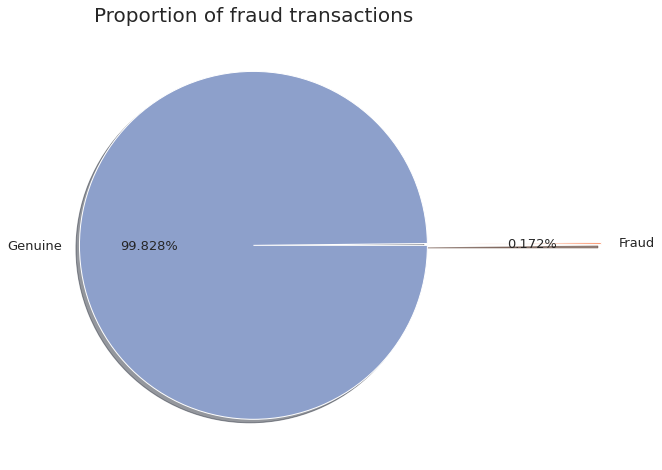

In [9]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/cases*100, 3)
print("Number of fraud cases out of {} total cases :".format(cases), fraud_count)
print("Number of non-fraud cases out of {} total cases :".format(cases), nonfraud_count)
print("Percentage of fraud cases :", fraud_percentage)

plt.figure(figsize = (8, 8))
pie_data = [df.Class[df["Class"] == 1].count(), df.Class[df["Class"] == 0].count()]
pie_labels = ["Fraud", "Genuine"]
plt.pie(pie_data, labels = pie_labels, explode = [1, 0], shadow = True, colors = mpl_color[1:3], autopct = "%.3f%%")
plt.title("Proportion of fraud transactions", size = 20)
plt.show()

Out of **275663 total cases, only 0.172% cases are fraud** which causes a problem of **imbalance** in our dataset.  
The evaluation of our final models will therefore be done **not based on the accuracy of the models** but based on the number of fraud transactions correctly predicted out of all the actual fraud transactions, in other words, **the recall of our algorithm.**

In [10]:
print(df[df["Class"]==0].Amount.describe()),
print(df[df["Class"]==1].Amount.describe())

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


# Robust Scaler
The range of data in the Amount column needs to be scaled in order to make it easy for the model to predict classes correctly.  
We will use RobustScaler to do the same.

In [11]:
scaler = RobustScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

# Undersampling
Even though we don't know what the "V" features are, we still need to know how much do they influence the target variable (Fraud or No Fraud). By having an imbalanced dataframe we will not able to see the true correlations between the class and features. Therefore, we must undersample the Class 0 to bring it down to equal proportions with the Class 1.  
  
Before we undersample, we need to make sure to have a test dataset from the original data, this test data has to be completely new to the model during predictions. Therefore, we'll do a train-test split and then proceed with undersampling. 

## Data Split

In [12]:
X_orig = df.loc[:,df.columns != "Class"]
y_orig = df.Class
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size = 0.2)

## Undersampling

In [13]:
df_train = pd.concat([X_train, y_train], axis=1)
print("Percentage distribution of fraud cases:", round(len(df_train[df_train.Class == 1])/len(df_train)*100, 3))
print("Number of Fraud cases in Training set:", len(df_train[df_train.Class == 1]))

# Lets shuffle the data before creating the new balanced dataframe
df_train = df_train.sample(frac=1)

fraud_df_train = df_train.loc[df_train['Class'] == 1]
non_fraud_df_train = df_train.loc[df_train['Class'] == 0][:len(fraud_df_train)]

balanced_df_train = pd.concat([fraud_df_train, non_fraud_df_train])

# Shuffle again
balanced_df_train = balanced_df_train.sample(frac=1, random_state=42)
print("Percentage distribution of fraud cases after balancing:", round(len(balanced_df_train[balanced_df_train.Class == 1])/len(balanced_df_train)*100, 3))
print("Number of Fraud cases in Training set after balancing:", len(balanced_df_train[balanced_df_train.Class == 1]))
balanced_df_train.info()

Percentage distribution of fraud cases: 0.165
Number of Fraud cases in Training set: 363
Percentage distribution of fraud cases after balancing: 50.0
Number of Fraud cases in Training set after balancing: 363
<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 42769 to 42945
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      726 non-null    float64
 1   V2      726 non-null    float64
 2   V3      726 non-null    float64
 3   V4      726 non-null    float64
 4   V5      726 non-null    float64
 5   V6      726 non-null    float64
 6   V7      726 non-null    float64
 7   V8      726 non-null    float64
 8   V9      726 non-null    float64
 9   V10     726 non-null    float64
 10  V11     726 non-null    float64
 11  V12     726 non-null    float64
 12  V13     726 non-null    float64
 13  V14     726 non-null    float64
 14  V15     726 non-null    float64
 15  V16     726 non-null    float64
 16  V17     7

# Checking correlation after Undersampling

Let's check the correlation matrix and derive further insights that affect target class.  
Here, we will only check correlation of each feature with the target class.

In [14]:
balanced_df_train.corr()["Class"][:-1]

V1       -0.429542
V2        0.492596
V3       -0.570192
V4        0.717845
V5       -0.364446
V6       -0.417400
V7       -0.477167
V8        0.131383
V9       -0.580502
V10      -0.627731
V11       0.687671
V12      -0.689687
V13      -0.036326
V14      -0.750712
V15       0.034558
V16      -0.597918
V17      -0.562782
V18      -0.470382
V19       0.289872
V20       0.232390
V21       0.106929
V22       0.009362
V23      -0.031760
V24      -0.082952
V25       0.024828
V26       0.040200
V27       0.120776
V28       0.118424
Amount    0.071423
Name: Class, dtype: float64

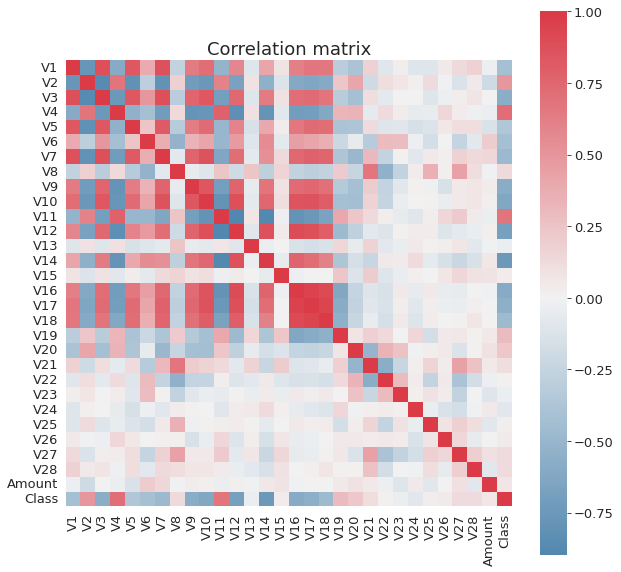

In [15]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(balanced_df_train.corr(), cmap = cmap, center=0, annot=False, square=True)
plt.title(label="Correlation matrix")
plt.show()

Highly negatively correlated - V14 V12 V10  
Highly positively correlated - V11 V4

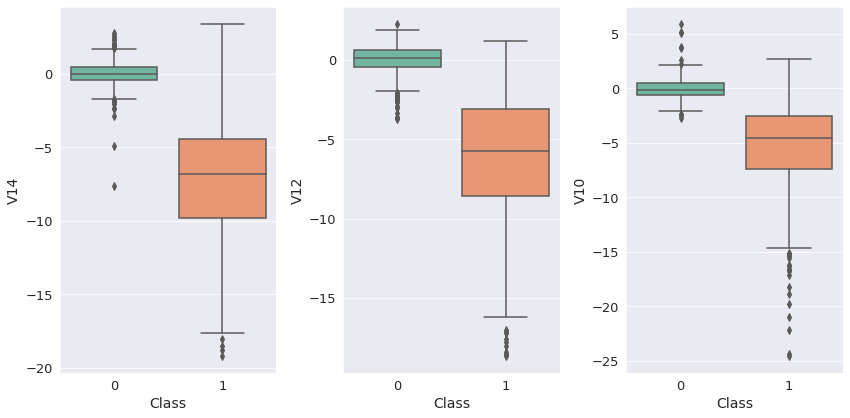

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=balanced_df_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=balanced_df_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=balanced_df_train, ax=ax[2])

plt.show()

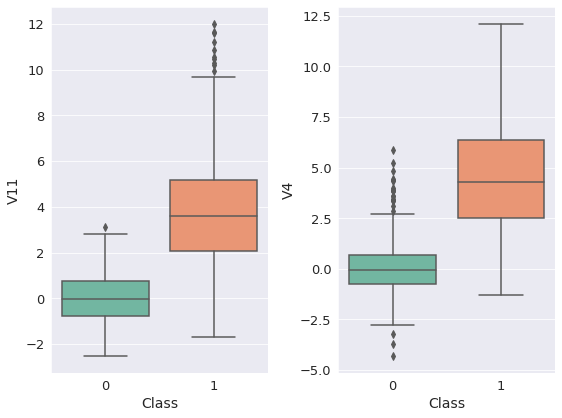

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=balanced_df_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=balanced_df_train, ax=ax[1])

plt.show()

# Outlier Analysis after undersampling
Predicting fraud when actually fraud is as important as not predicting fraud when actually not fraud. In other words, high Recall score is the goal.  
In order to predict the fraud cases very accurately, we need to take care of these outliers present in the highly correlated features.

In [18]:
out_features = ["V14", "V12", "V10"]
for feature in out_features:
    Q1 = balanced_df_train[feature].quantile(0.25)
    Q3 = balanced_df_train[feature].quantile(0.75)
    IQR = Q3-Q1
    top = Q3 + 1.5*IQR # Not necessary for negatively correlated features
    bottom = Q1 - 1.5*IQR

    index = balanced_df_train[(balanced_df_train[feature] < bottom)].index
    print(len(index), " number of", feature, " outliers removed from the dataset")
    balanced_df_train = balanced_df_train.drop(index)

Plotting boxplots again to see the change and required next steps.

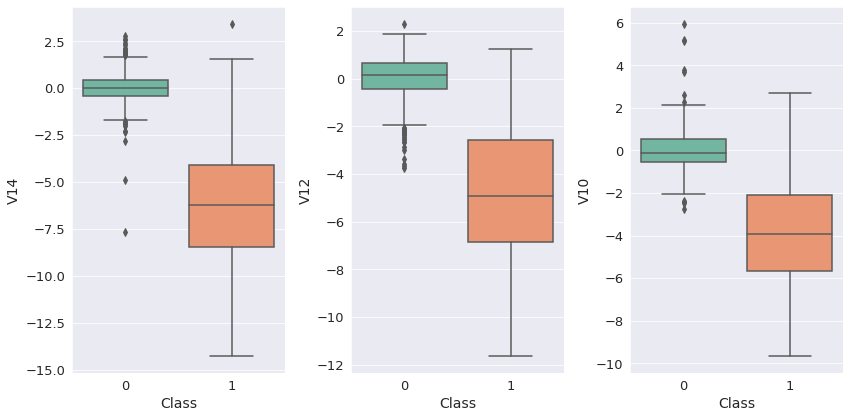

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=balanced_df_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=balanced_df_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=balanced_df_train, ax=ax[2])

plt.show()

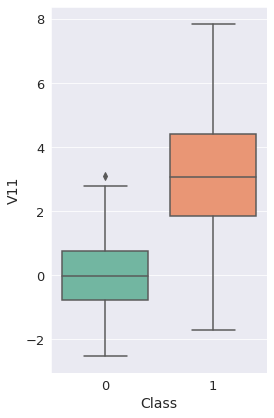

In [20]:
plt.figure(figsize=(4,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=balanced_df_train)
plt.show()

All the outliers have been dealt with. We will proceed with the modelling.

# Modelling after Undersampling

The following models will be tried in this case study:  
1. Logistic Regression Classifier
2. KNN Classifier
3. SV Classifier
4. Random Forest Classifier
5. XGB Classifier

For every algorithm, we'll do Hyperparameter tuning using GridSearchCV in order to get the best parameters and best CV score. We will then apply each best model again to get the training score.  
High training score and low CV score ==> Overfitting to train set
Low training score and low CV score ==> Underfitting
Both high scores ==> A good generalized model

In [21]:
y_balanced = balanced_df_train.Class
X_balanced = balanced_df_train.loc[:, balanced_df_train.columns != 'Class']

## Logistic Regression

In [29]:
param_grid = {'C': [0.1,0.5,1,10], 'max_iter' : [500, 750], 'tol':[0.00001,0.0001, 0.001]}
lr_grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5)
lr_grid.fit(X_balanced, y_balanced)
print(lr_grid.best_score_)    
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.9369318819436652
{'C': 0.5, 'max_iter': 500, 'tol': 1e-05}
LogisticRegression(C=0.5, max_iter=500, solver='liblinear', tol=1e-05)


### Logistic regression - Fit best model

In [30]:
lr_model = LogisticRegression(C=0.5, max_iter=500, solver='liblinear', tol=1e-05)
lr_model.fit(X_balanced, y_balanced)
lr_yhat = lr_model.predict(X_balanced)
print(classification_report(y_balanced, lr_yhat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       363
           1       0.98      0.91      0.95       303

    accuracy                           0.95       666
   macro avg       0.96      0.95      0.95       666
weighted avg       0.96      0.95      0.95       666



## KNN Classifier

In [24]:
param_grid = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid.fit(X_balanced, y_balanced)

print(knn_grid.best_score_)    
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

0.9309505106048703
{'algorithm': 'auto', 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


### KNN - Fit best model

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_balanced, y_balanced)
knn_yhat = knn_model.predict(X_balanced)
print(classification_report(y_balanced, knn_yhat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       363
           1       0.98      0.93      0.95       303

    accuracy                           0.96       666
   macro avg       0.96      0.96      0.96       666
weighted avg       0.96      0.96      0.96       666



## SVM Classifier

In [25]:
param_grid = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=5)
svc_grid.fit(X_balanced, y_balanced)

print(svc_grid.best_score_)    
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

0.9384468634272247
{'C': 0.5, 'kernel': 'linear'}
SVC(C=0.5, kernel='linear')


### SVC - Fit best model

In [32]:
svc_model = SVC(C=0.5, kernel='linear')
svc_model.fit(X_balanced, y_balanced)
svc_yhat = svc_model.predict(X_balanced)
print(classification_report(y_balanced, svc_yhat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       363
           1       0.99      0.91      0.95       303

    accuracy                           0.95       666
   macro avg       0.96      0.95      0.95       666
weighted avg       0.96      0.95      0.95       666



## Random Forest Classifier

In [34]:
param_grid = {'max_depth': [5, 6, 7, 8], 'max_features': [4,5,6,7,8],'n_estimators':[100, 250, 500],'min_samples_split': [4, 5, 6, 7]}
rf_grid = GridSearchCV(RandomForestClassifier(),param_grid, cv=5)
rf_grid.fit(X_balanced, y_balanced)
print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

0.9399394007406576
{'max_depth': 6, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier(max_depth=6, max_features=5, min_samples_split=7)


### RF - Fit best model

In [35]:
rf_model = RandomForestClassifier(max_depth=6, max_features=5, min_samples_split=7, n_estimators=100)
rf_model.fit(X_balanced, y_balanced)
rf_yhat = rf_model.predict(X_balanced)
print(classification_report(y_balanced, rf_yhat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       363
           1       1.00      0.92      0.96       303

    accuracy                           0.97       666
   macro avg       0.97      0.96      0.96       666
weighted avg       0.97      0.97      0.97       666



## XGB Classifier

In [28]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001], 'n_estimators':[500, 750], 'min_child_weight':[1,5,10]}
xgb_grid = GridSearchCV(XGBClassifier(),param_grid, cv=5)
xgb_grid.fit(X_balanced, y_balanced)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

0.9339243631466727
{'gamma': 0.001, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.001, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


### XGB - Fit best model

In [33]:
xgb_model = XGBClassifier(max_depth=5, gamma=0.001, min_child_weight=1, n_estimators=500)
xgb_model.fit(X_balanced, y_balanced)
xgb_yhat = xgb_model.predict(X_balanced)
print(classification_report(y_balanced, xgb_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       1.00      1.00      1.00       303

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666



### Selecting the best one
Out of all the models and their given scores, Random Forest Classifier gave the best results in terms of Training and CV scores keeping in mind the generalization of model to avoid overfitting and still be able to predict accurately on unseen data.  
Fitting the best model on test data:

In [45]:
rf_test_yhat = rf_model.predict(X_test)
print(classification_report(y_test, rf_test_yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55023
           1       0.10      0.85      0.18       110

    accuracy                           0.98     55133
   macro avg       0.55      0.92      0.58     55133
weighted avg       1.00      0.98      0.99     55133



As we can see from the above test scores, the undersampling method in this scenario has not performed well for the model to train on the fraud cases properly. The model is still predicting 0 or Non fraud for a lot of the Fraud cases.  
Out of all the actual fraud cases (110), model was able to predict 85% of them correctly (as fraud).  
Out of all the predicted frauds, only 10% were actually fraud. It means that this model has made a lot of customers angry by accusing them of fraud, by mistake ofcourse.

# Oversampling (SMOTE)

In [46]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [51]:
y_sm.value_counts()

0    220167
1    220167
Name: Class, dtype: int64

Let's try fitting a Random Forest model here with similar parameters as last time. Then we will compare our results with the previous case of undersampling.

In [52]:
rf_sm_model = RandomForestClassifier(max_depth=6, max_features=5, min_samples_split=7, n_estimators=100)
rf_sm_model.fit(X_sm, y_sm)
rf_sm_yhat = rf_sm_model.predict(X_sm)
print(classification_report(y_sm, rf_sm_yhat))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    220167
           1       1.00      0.92      0.96    220167

    accuracy                           0.96    440334
   macro avg       0.96      0.96      0.96    440334
weighted avg       0.96      0.96      0.96    440334



Now let's predict our target using this model

In [53]:
rf_sm_test_yhat = rf_sm_model.predict(X_test)
print(classification_report(y_test, rf_sm_test_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55023
           1       0.38      0.80      0.51       110

    accuracy                           1.00     55133
   macro avg       0.69      0.90      0.76     55133
weighted avg       1.00      1.00      1.00     55133



As we can see from the above test scores, the oversampling method, specifically the SMOTE method has performed a bit better.  
Out of all the actual fraud cases (110), model was able to predict 80% of them correctly (as fraud).  
Out of all the predicted frauds, 38% were actually fraud.

In [56]:
df_sm_train = pd.concat([X_sm, y_sm], axis=1)
df_sm_train.corr()["Class"][:-1]

V1       -0.419784
V2        0.500665
V3       -0.570340
V4        0.728425
V5       -0.371992
V6       -0.461815
V7       -0.480456
V8        0.170656
V9       -0.591687
V10      -0.639627
V11       0.703686
V12      -0.692221
V13      -0.059111
V14      -0.764252
V15       0.012137
V16      -0.598372
V17      -0.570009
V18      -0.472997
V19       0.295607
V20       0.226764
V21       0.138101
V22       0.042640
V23      -0.030117
V24      -0.100309
V25       0.048993
V26       0.051700
V27       0.119176
V28       0.114398
Amount    0.038837
Name: Class, dtype: float64

Highly negatively correlated - V14 V12 V10  
Highly positively correlated - V11 V4

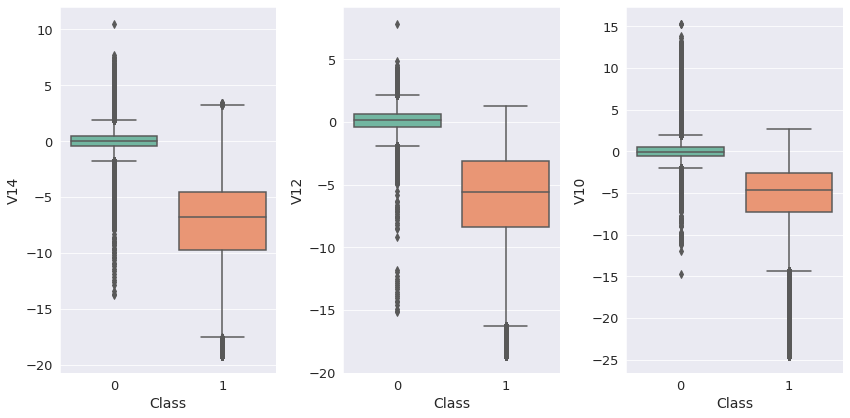

In [57]:
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=df_sm_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=df_sm_train, ax=ax[2])

plt.show()

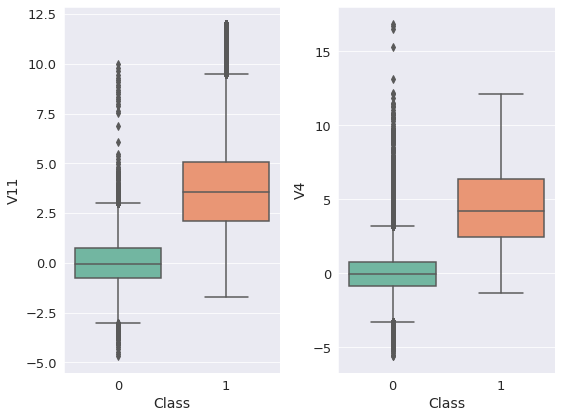

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=df_sm_train, ax=ax[1])

plt.show()

In [59]:
out_features = ["V14", "V12", "V10"]
for feature in out_features:
    Q1 = df_sm_train[feature].quantile(0.25)
    Q3 = df_sm_train[feature].quantile(0.75)
    IQR = Q3-Q1
    top = Q3 + 1.5*IQR # Not necessary for negatively correlated features
    bottom = Q1 - 1.5*IQR

    index = df_sm_train[(df_sm_train[feature] < bottom)].index
    print(len(index), " number of", feature, " outliers removed from the dataset")
    df_sm_train = df_sm_train.drop(index)

2124  number of V14  outliers removed from the dataset
13659  number of V12  outliers removed from the dataset
20752  number of V10  outliers removed from the dataset


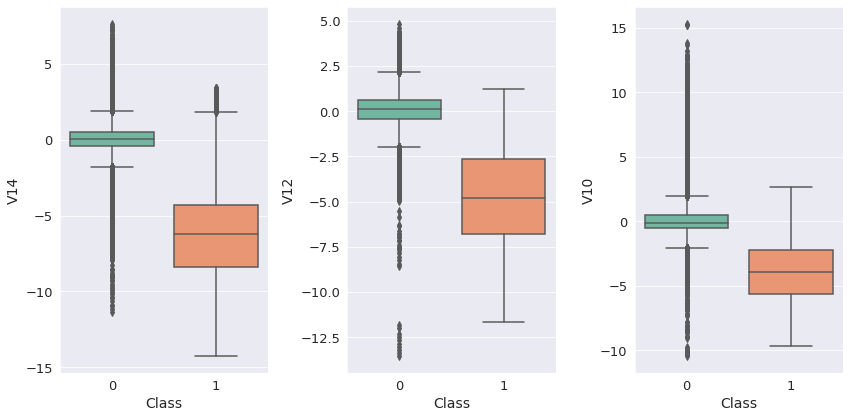

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=df_sm_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=df_sm_train, ax=ax[2])

plt.show()

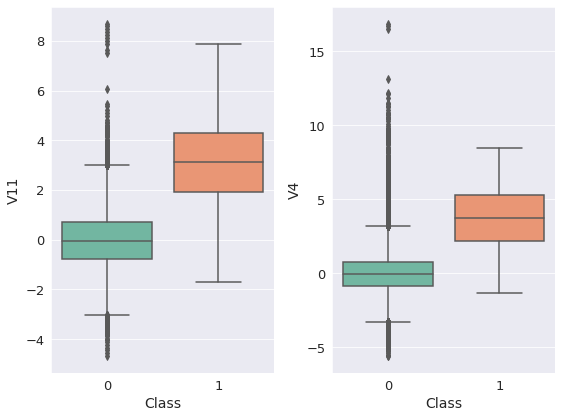

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=df_sm_train, ax=ax[1])

plt.show()

In [62]:
y_sm_new = df_sm_train.Class
X_sm_new = df_sm_train.loc[:, df_sm_train.columns != 'Class']

In [63]:
rf_sm_model = RandomForestClassifier(max_depth=6, max_features=5, min_samples_split=7, n_estimators=100)
rf_sm_model.fit(X_sm_new, y_sm_new)
rf_sm_yhat = rf_sm_model.predict(X_sm_new)
print(classification_report(y_sm_new, rf_sm_yhat))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    220156
           1       1.00      0.91      0.95    183643

    accuracy                           0.96    403799
   macro avg       0.96      0.95      0.96    403799
weighted avg       0.96      0.96      0.96    403799



Now let's predict our target using this model

In [64]:
rf_sm_test_yhat = rf_sm_model.predict(X_test)
print(classification_report(y_test, rf_sm_test_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55023
           1       0.41      0.81      0.55       110

    accuracy                           1.00     55133
   macro avg       0.71      0.90      0.77     55133
weighted avg       1.00      1.00      1.00     55133



# Better now